# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set url and assign units measure in F 
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

number = 1
set_num = 1

# List that's used to store the data for each city
weather_data = []

print('Beginning Data Retrieval')
print('---------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        weather_check = response['weather']
        weather_data.append(response)     #collecting the data for 'weather_data' list
        
        print(f'Processing Record {number} of Set {set_num} | {city}')
        number +=1 
        if number == 51:
            number=0
            set_num +=1 
    except:
        print('City not found. Skipping...')
        pass
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

# I wrote the code to match the output that was given (the answer in the cell without the code).
# If it was up to me how to group the Sets, I would start counting Processing Record from 1 
# instead 0. That way we would get 50 Records per Set. 

# Otherwise, when we start counting Processing Records from 0 (in each Set), in results 
# it gives us 51 records per Set.

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | cabedelo
Processing Record 3 of Set 1 | mehamn
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | sao gabriel da cachoeira
Processing Record 7 of Set 1 | mugur-aksy
Processing Record 8 of Set 1 | nome
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | tiarei
City not found. Skipping...
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | brae
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | kalabo
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | tommot
Processing Record 19 of Set 1 | basoko
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | artyom
Processing Record 22 of Set 1 | mataura
Processing Record 23

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
output_path = os.path.join('..','data','cities_data.csv')
with open (output_path, 'w', encoding = 'utf-8') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter = ",")
    csvwriter.writerow (['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])    
    
    for index in range(len(weather_data)):    
        City = cities[index]
        Lat = weather_data[index]['coord']['lat']
        Lng = weather_data[index]['coord']['lon']
        Max_Temp = weather_data[index]['main']['temp']
        Humidity = weather_data[index]['main']['humidity']                                
        Cloudiness = weather_data[index]['clouds']['all']
        Wind_Speed = weather_data[index]['wind']['speed']
        Country = weather_data[index]['sys']['country']
        Date = weather_data[index]['dt']
        
        csvwriter.writerow ([City, Lat, Lng, Max_Temp, Humidity, Cloudiness, Wind_Speed, Country, Date])
    
# Creating Data Frame
Cities_df = pd.read_csv(output_path)
Cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,64.08,74,67,11.30,AU,1655691864
1,cabedelo,-6.9811,-34.8339,75.87,84,23,9.28,BR,1655691865
2,mehamn,71.0357,27.8492,42.75,100,100,0.00,NO,1655691865
3,constitucion,-35.3333,-72.4167,51.30,68,100,3.89,CL,1655691865
4,rikitea,-23.1203,-134.9692,71.78,65,95,22.12,PF,1655691865


In [5]:
Stats_df = Cities_df.describe()
Stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,21.106906,14.395364,66.412523,72.055856,56.187387,7.740901,1.655692e+09
std,32.852983,91.045426,13.460171,19.519557,40.922806,5.620221,6.053614e+01
min,-54.800000,-175.200000,31.660000,8.000000,0.000000,0.000000,1.655692e+09
25%,-3.864600,-66.370450,55.605000,61.000000,10.500000,3.480000,1.655692e+09
50%,25.716700,20.226300,67.370000,76.000000,70.000000,5.930000,1.655692e+09
75%,49.691800,91.028200,77.350000,86.000000,100.000000,11.180000,1.655692e+09
max,78.218600,179.316700,93.130000,100.000000,100.000000,38.010000,1.655692e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#I don't have cities with over 100% of Humidity at the moment of working with the current Data Set.
#In case I re-run my code, and different random cities appear which do have over 100% of Humidity...
#then the code below will filter out and keep the cities with no more than 100% Humidity.

Filtered_df = Cities_df.loc[Cities_df['Humidity'] <=100, :]
Updated_Stats_df = Filtered_df.describe()
Updated_Stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,21.106906,14.395364,66.412523,72.055856,56.187387,7.740901,1.655692e+09
std,32.852983,91.045426,13.460171,19.519557,40.922806,5.620221,6.053614e+01
min,-54.800000,-175.200000,31.660000,8.000000,0.000000,0.000000,1.655692e+09
25%,-3.864600,-66.370450,55.605000,61.000000,10.500000,3.480000,1.655692e+09
50%,25.716700,20.226300,67.370000,76.000000,70.000000,5.930000,1.655692e+09
75%,49.691800,91.028200,77.350000,86.000000,100.000000,11.180000,1.655692e+09
max,78.218600,179.316700,93.130000,100.000000,100.000000,38.010000,1.655692e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.

# Again, I did it just because if I re-run my code and cities with over 100% Humidity will appear.
#I didn't need to do this step for my curent Data Set.

Index_list = Cities_df[Cities_df['Humidity'] > 100].index.tolist()
Index_list


[]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# I did it above with the .loc function... So I call it. (but as I stated above, this whole step wasn't needed for my curent Data Set)
Filtered_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,64.08,74,67,11.30,AU,1655691864
1,cabedelo,-6.9811,-34.8339,75.87,84,23,9.28,BR,1655691865
2,mehamn,71.0357,27.8492,42.75,100,100,0.00,NO,1655691865
3,constitucion,-35.3333,-72.4167,51.30,68,100,3.89,CL,1655691865
4,rikitea,-23.1203,-134.9692,71.78,65,95,22.12,PF,1655691865


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
#Defining a general function to create Scatter Plot Graphs
def weather_scatter_plot(x_values, y_values,title, x_label, y_label):
    
    #Create Scatter Plot
    plt.scatter(x_values,y_values, edgecolors='black')
    plt.grid(color='#9FA095', alpha=1)
    
    #Title and Labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

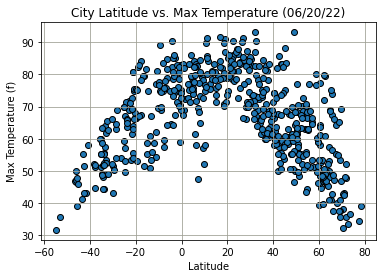

In [10]:
#Get today's date and format it mm/dd/yy
Today = date.today()
Todays_date = Today.strftime('%m/%d/%y')

#Creating City Latitude vs Max Temperature scatter plot
weather_scatter_plot(Filtered_df['Lat'], Filtered_df['Max Temp'],
                     f'City Latitude vs. Max Temperature ({Todays_date})',
                     'Latitude', 'Max Temperature (f)')

#Saving Figure to my output_data folder
plt.savefig("../Images/Lat_vs_MaxTemp.png")

#Show the plot
plt.show()

## Latitude vs. Humidity Plot

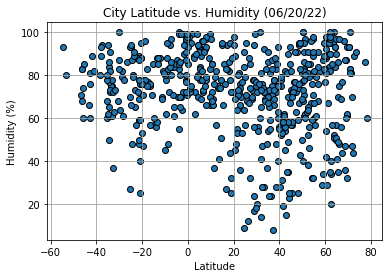

In [11]:
#Creating City Latitude vs Humidity scatter plot
weather_scatter_plot(Filtered_df['Lat'], Filtered_df['Humidity'],
                     f'City Latitude vs. Humidity ({Todays_date})',
                     'Latitude', 'Humidity (%)')

#Saving Figure to my output_data folder
plt.savefig("../Images/Lat_vs_Humidity.png")

#Show the plot
plt.show()

## Latitude vs. Cloudiness Plot

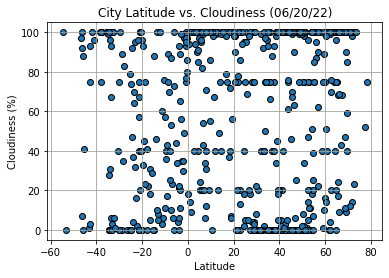

In [12]:
#Creating City Latitude vs Cloudiness scatter plot
weather_scatter_plot(Filtered_df['Lat'], Filtered_df['Cloudiness'],
                     f'City Latitude vs. Cloudiness ({Todays_date})',
                     'Latitude', 'Cloudiness (%)')

#Saving Figure to my output_data folder
plt.savefig("../Images/Lat_vs_Cloudiness.png")

#Show the plot
plt.show()

## Latitude vs. Wind Speed Plot

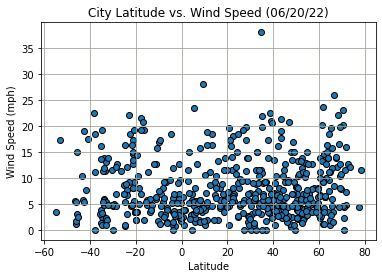

In [13]:
#Creating City Latitude vs Wind Speed scatter plot
weather_scatter_plot(Filtered_df['Lat'], Filtered_df['Wind Speed'],
                     f'City Latitude vs. Wind Speed ({Todays_date})',
                     'Latitude', 'Wind Speed (mph)')

#Saving Figure to my output_data folder
plt.savefig("../Images/Lat_vs_WindSpeed.png")

#Show the plot
plt.show()

## Linear Regression

In [15]:
#Defining a general function to create Linear Regression Plots
def plot_linear_regression(x_values, y_values, x_line_eq, y_line_eq, x_label, y_label):
    
    #Perform  Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    
    #Get regression values
    regress_values = x_values * slope + intercept
    
    #Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create Scatter Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    #Displaying equation on the plot
    plt.annotate(line_eq,(x_line_eq, y_line_eq),fontsize=15,color="red")
    
    #Labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    #Printing r-values
    print(f'The r-value is: {rvalue**2}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4876035601629339


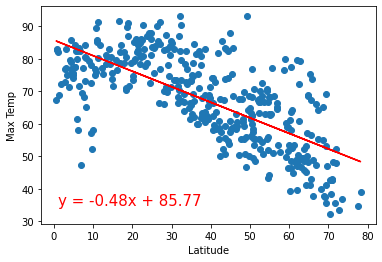

In [16]:
#Filtering the Data to get Northern Hemisphere
Northern_df = Filtered_df.loc[Filtered_df['Lat']>0, :]

#Plotting Latitude vs Max Temp chart for the Nothern Hemisphere 
plot_linear_regression(Northern_df['Lat'], Northern_df['Max Temp'],1,35,'Latitude', 'Max Temp')

#Saving Figure to my output_data folder
plt.savefig("../Images/NorthernHem_Lat_vs_MaxTemp.png")

#Show the plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5832214945692634


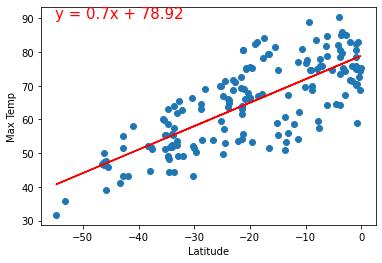

In [17]:
#Filtering the Data to get Southern Hemisphere
Southern_df = Filtered_df.loc[Filtered_df['Lat']<0, :]

#Plotting Latitude vs Max Temp chart for the Souhern Hemisphere 
plot_linear_regression(Southern_df['Lat'], Southern_df['Max Temp'],-55,90,'Latitude', 'Max Temp')

#Saving Figure to my output_data folder
plt.savefig("../Images/SouthernHem_Lat_vs_MaxTemp.png")

#Show the plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0048939959146010415


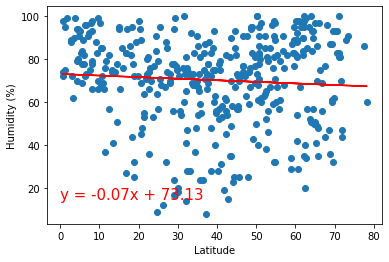

In [18]:
#Plotting Latitude vs Humidity chart for the Nothern Hemisphere 
plot_linear_regression(Northern_df['Lat'], Northern_df['Humidity'],0,15,'Latitude', 'Humidity (%)')

#Saving Figure to my output_data folder
plt.savefig("../Images/NorthernHem_Lat_vs_Humidity.png")

#Show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.019968090579413005


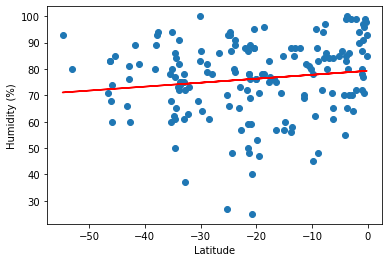

In [19]:
#Plotting Latitude vs Humidity chart for the Southern Hemisphere 
plot_linear_regression(Southern_df['Lat'], Southern_df['Humidity'],-55,20,'Latitude', 'Humidity (%)')

#Saving Figure to my output_data folder
plt.savefig("../Images/SouthernHem_Lat_vs_Humidity.png")

#Show the plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00019602448706649835


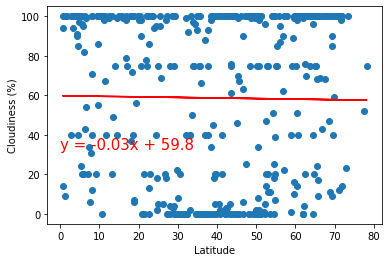

In [20]:
#Plotting Latitude vs Cloudiness chart for the Nothern Hemisphere 
plot_linear_regression(Northern_df['Lat'], Northern_df['Cloudiness'],0,33,'Latitude', 'Cloudiness (%)')

#Saving Figure to my output_data folder
plt.savefig("../Images/NorthernHem_Lat_vs_Cloudiness.png")

#Show the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0027216162097494206


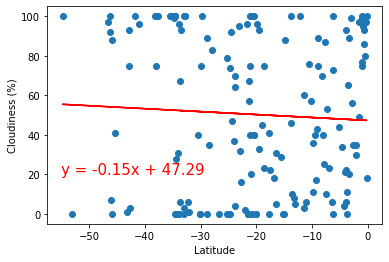

In [22]:

#Plotting Latitude vs Cloudiness chart for the Sothern Hemisphere 
plot_linear_regression(Southern_df['Lat'], Southern_df['Cloudiness'],-55,20,'Latitude', 'Cloudiness (%)')

#Saving Figure to my output_data folder
plt.savefig("../Images/SouthernHem_Lat_vs_Cloudiness.png")

#Show the plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.013839290625290606


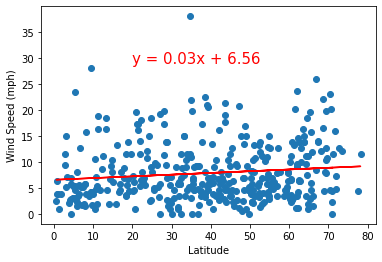

In [23]:
#Plotting Latitude vs Wind Speed chart for the Nothern Hemisphere 
plot_linear_regression(Northern_df['Lat'], Northern_df['Wind Speed'],20,29,'Latitude', 'Wind Speed (mph)')

#Saving Figure to my output_data folder
plt.savefig("../Images/NorthernHem_Lat_vs_WindSpeed.png")

#Show the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.029130051594487522


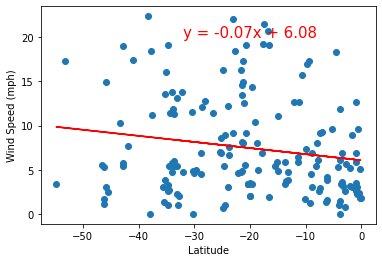

In [24]:
#Plotting Latitude vs Wind Speed chart for the Sothern Hemisphere 
plot_linear_regression(Southern_df['Lat'], Southern_df['Wind Speed'],-32,20,'Latitude', 'Wind Speed (mph)')

#Saving Figure to my output_data folder
plt.savefig("../Images/SouthernHem_Lat_vs_WindSpeed.png")

#Show the plot
plt.show()